In [ ]:
import numpy as np
import pandas as pd
import time
import os
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import linregress

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "none"

In [2]:
ds_train = pd.read_hdf('DS_2_train_extended_float32.hdf')

[ -999 38486]

LinregressResult(slope=-0.026944021425113637, intercept=57099.365691442217, rvalue=-0.22657907094485003, pvalue=4.341384137625115e-11, stderr=0.0040324722206023433)


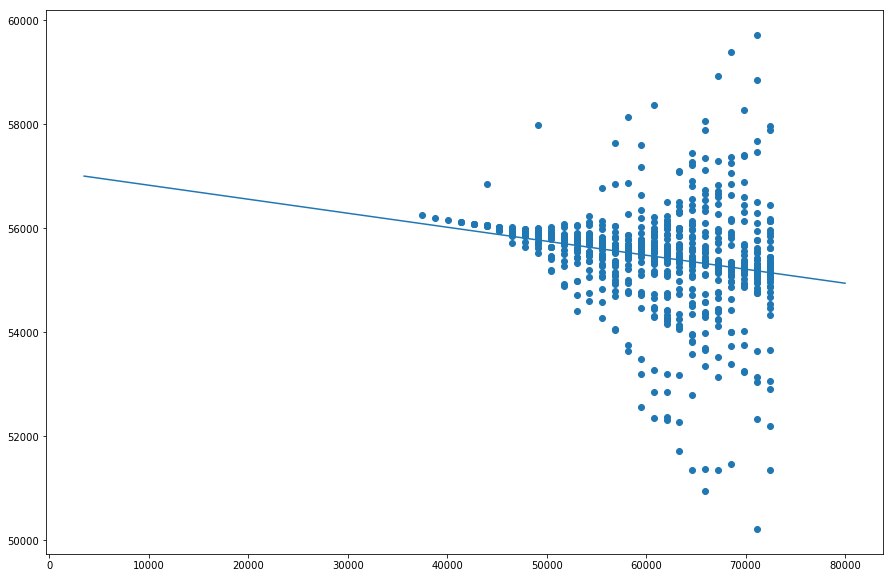

In [21]:
brick_nb = 25
df = ds_train[ds_train.brick_number == brick_nb ][['event_id', 'X', 'Y', 'Z']]

events = np.unique(np.array(df['event_id']))
print (events)
print ()

length = len(events)
for i in range (1,length):
    sig = df[df.event_id == events[i]]

    X_pos = sig['X']
    Y_pos = sig['Y']
    Z_pos = sig['Z']


    res = linregress(Z_pos, X_pos)
    print (res)

    Z_lin = np.linspace(3500, 80000, 100)
    X_lin = res.slope * Z_lin + res.intercept

    fig, ax = plt.subplots(1, figsize=(15, 10))
    ax.scatter(Z_pos, X_pos, cmap='PiYG', vmin=0, vmax=1, alpha = 1)
    ax.plot(Z_lin, X_lin)
    plt.show()

